Text(0.5, 1.0, 'Jump Diffusion Process')

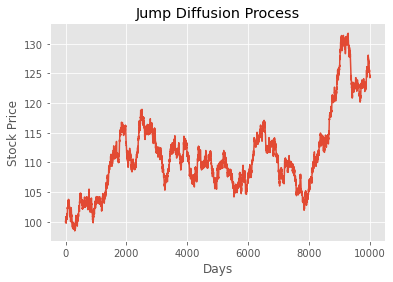

In [133]:
 import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import pandas as pd

def merton_jump_paths(S, T, r, sigma,  lam, m, v, steps, Npaths):
    size=(steps,Npaths)
    dt = T/steps 
    poi_rv = np.multiply(np.random.poisson( lam*dt, size=size),
                         np.random.normal(m,v, size=size)).cumsum(axis=0)
    geo = np.cumsum(((r -  sigma**2/2 -lam*(m  + v**2*0.5))*dt +\
                              sigma*np.sqrt(dt) * \
                              np.random.normal(size=size)), axis=0)
    
    return np.exp(geo+poi_rv)*S


S = 100 # current stock price
T = 1 # time to maturity
r = 0.02 # risk free rate
m = 0 # meean of jump size
v = 0.3 # standard deviation of jump
lam =1 # intensity of jump i.e. number of jumps per annum
steps =10000 # time steps
Npaths = 1 # number of paths to simulate
sigma = 0.2 # annaul standard deviation , for weiner process

j = merton_jump_paths(S, T, r, sigma, lam, m, v, steps, Npaths)

plt.plot(j)
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Jump Diffusion Process')

In [134]:
df = pd.read_csv('C:/Users/saxen/Downloads/AFP_Data.csv')
df['date'] = pd.to_datetime(df['date'])
from datetime import timedelta
df['date'].iloc[0] + timedelta(days=1) 
end_date = df['date'][len(df['date'])-1]
str_date = df['date'][0]



df['date_count'] = df.date.map(df.groupby('date').size())
count= sum(df['date_count'])

event_dates = len(df['date'].unique())


IPO_count=0 

bankruptcy_count = 0

for i in range(len(df)):
    if df['deal_type'][i] == "IPO":
        IPO_count +=1 
IPO_count  

for j in range(len(df)):
    if df['deal_type'][j] == "Bankruptcy: Liquidation":
        bankruptcy_count +=1 
        
for k in range(len(df)):
    if df['deal_type'][k] == "Bankruptcy: Admin/Reorg":
        bankruptcy_count +=1        

        
total_dates =0

t = str_date
while t < end_date:
    total_dates += 1
    t += timedelta(days=1)

No_round_count = total_dates - event_dates

all_dates_count = total_dates

round_count = event_dates - IPO_count - bankruptcy_count


#############

round_prob = round_count/ all_dates_count
IPO_prob = IPO_count/ all_dates_count
bankruptcy_prob = bankruptcy_count/all_dates_count
no_round_prob = No_round_count/all_dates_count

print(round_prob,IPO_prob, no_round_prob,bankruptcy_prob)

0.5367737948084055 0.161516275236918 0.2893489905232798 0.012360939431396786


In [135]:
df1 = pd.read_csv('C:/Users/saxen/Downloads/Company/company2.csv')
df1['date'] = pd.to_datetime(df1['date'])

a=0.007
b=1

df1["running_prob"] = 1/(1 + np.exp(-a*(np.log(df1['post_money_valuation']) - b )))      
        
c_prob_round = df1["running_prob"][len(df1)-1]
c_prob_IPO = IPO_prob
c_prob_bankruptcy = bankruptcy_prob
c_no_round_prob = 1-c_prob_round -c_prob_IPO-c_prob_bankruptcy

print(c_prob_round,c_prob_IPO,c_no_round_prob, c_prob_bankruptcy)

0.5282090312651154 0.161516275236918 0.2979137540665698 0.012360939431396786


In [136]:
data = pd.read_csv('C:/Users/saxen/Downloads/Company/company2.csv')
data['date'] = pd.to_datetime(data['date'])

In [138]:
df1

,id,company_id,round_count,date,status,post_money_valuation,deal_amount,total_capital_raised,bloat,dilutive_impact,deal_type,running_prob
0,65ecbd61-73e3-4638-9859-41b9e4a84937,02f2babd-28e9-407c-abf6-ff5ae17495f4,11,1970-01-01 00:00:00.000041556,Completed,27690000,27690000,137630000,4.9704,1,Merger/Acquisition,0.528209


In [137]:
lambada = []
for i in range(1,len(data)-1):
    jump=0
    jump = (data["post_money_valuation"][i] - data['deal_amount'][i] - data["post_money_valuation"][i-1])/data["post_money_valuation"][i-1]
    time = (data['date'][i] - data['date'][i-1]).days
    lambada.append(jump*365/time)

print(np.mean(lambada))
print(np.std(lambada))
intensity = len(lambada)/(((data['date'][len(data)-1] - data['date'][0]).days)/365)
print(intensity)


nan
nan


C:\Users\saxen\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\saxen\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\saxen\Anaconda3\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\saxen\Anaconda3\lib\site-packages\numpy\core\_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\saxen\Anaconda3\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ZeroDivisionError: float division by zero

In [115]:
geom = []
for i in range(1,len(data)-1):
    ret=0
    ret = (data["deal_amount"][i])/data["post_money_valuation"][i-1]
    time = (data['date'][i] - data['date'][i-1]).days
    geom.append(ret*365/time)
geom= geom[1:]
geom



[0.10824701839696864]

Text(0.5, 1.0, 'Jump Diffusion Process')

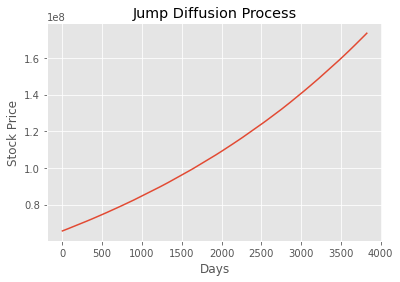

In [116]:
S = data['post_money_valuation'][0] # current stock price
T = ((data['date'][len(data)-1] - data['date'][0]).days)/365 # time to maturity

##Selection bias removal
c_prob_round
c_prob_IPO
c_prob_bankruptcy
c_no_round_prob

r = np.mean(geom) # risk free rate
m = np.mean(np.array(lambada)*np.array(c_prob_round)) # meean of jump size
v = np.std(np.array(lambada)*np.array(c_prob_round)) # standard deviation of jump
lam = intensity # intensity of jump i.e. number of jumps per annum
steps =  3825 #time steps
Npaths = 10000 # number of paths to simulate
sigma = np.std(geom) # annaul standard deviation , for weiner process

j = merton_jump_paths(S, T, r, sigma, lam, m, v, steps, Npaths)

plt.plot(np.mean(j,axis=1))
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Jump Diffusion Process')

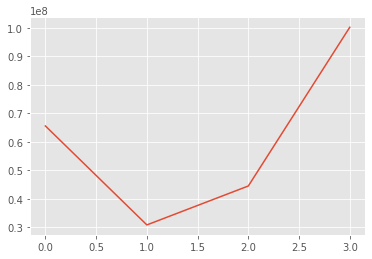

In [117]:
plt.plot(data['post_money_valuation'])

Liquidation method

In [119]:
theta=0.5
V_thresh = data['post_money_valuation'][len(data)-1]
u1 = (sigma**2/2 - r - lam*np.log(theta) + np.sqrt((sigma**2/2 - r - lam*np.log(theta))**2 +(2*sigma**2+2*lam*(np.log(theta))**2)*(lam+rf)))/(sigma**2+lam*(np.log(theta))**2)
a1= (1/u1)*(V_thresh**(1-u1))

In [120]:
V = np.mean(j,axis=1)[-1]
Liq_val = a1*(V**u1)
Liq_val

160672419.86896166

In [121]:
##Assuming K = liquidation value
mcprice = np.maximum(np.mean(j,axis=1)[-1]-Liq_val,0)*np.exp(-rf*T)
mcprice

10730112.299372502

In [131]:
f = {"company_id": [str(1)],"post_money_valuation": [data['post_money_valuation'][len(data)-1]], "volatility": [v], "mean_return": [m],"option_price": [mcprice]}
result = pd.DataFrame(f)

In [132]:
result

,company_id,post_money_valuation,volatility,mean_return,option_price
0,1,100240000,0.055803,-0.032194,1.073011e+07
